<a href="https://colab.research.google.com/github/yesin25/Projects-Pry/blob/main/Sedapal_volumen_m3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import math
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats

from sklearn.preprocessing import MinMaxScaler
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from keras.models import Sequential
from keras.layers import Dense, LSTM

# settings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 0.Importando los datos

In [ ]:
df1=pd.read_excel("/content/drive/My Drive/Mis proyectos/sedapal/DataDummy_Sedapal_2.xlsx")
df1.head(5)

,Año,Facturado Mm3,Variación,Comercial,Doméstico,Estatal,Industrial,Social
0,1905-06-02,257.5,0.019400,25.0,199.1,19.0,6.3,6.1
1,1905-06-03,262.5,0.019417,25.5,203.1,19.4,6.5,6.2
2,1905-06-04,267.6,0.019429,26.0,207.1,19.8,6.6,6.3
3,1905-06-05,272.8,0.019432,26.6,211.2,20.2,6.7,6.4
4,1905-06-06,278.1,0.019428,27.1,215.4,20.6,6.9,6.6


In [ ]:
#df1.iloc[40,:]

In [ ]:
#eliminamos la fila de indice 0 y ultima fila de indice 40
#df1 = df1.drop([0,40])
del(df1['Variación'])

In [ ]:
#df1.drop(columns=['Variación']).head(5)
#df1.drop([1,17])

In [ ]:
#seleccionamos desde el año 1999
#df1.iloc[19:40,:]
#df1.iloc[18:39,]
#df1.iloc[18:39]
#df1.iloc[0:18,:]
#df1.drop(df1.iloc[0:18,:], axis=1)
#df1.drop([0, 18],axis=0)

In [ ]:
df2=df1.iloc[19:40,:]
df2

,Año,Facturado Mm3,Comercial,Doméstico,Estatal,Industrial,Social
19,1905-06-21,371.4,36.4,289.3,27.7,9.2,8.8
20,1905-06-22,378.6,37.1,295.0,28.2,9.4,9.0
21,1905-06-23,383.7,36.5,294.1,30.8,9.6,12.7
22,1905-06-24,390.9,36.9,298.4,31.4,10.0,14.2
23,1905-06-25,393.0,37.5,301.6,31.5,9.9,12.4
24,1905-06-26,386.2,35.8,297.5,30.4,9.5,13.0
25,1905-06-27,394.6,37.0,301.4,31.7,9.8,14.7
26,1905-06-28,410.1,40.5,311.1,32.7,10.7,15.1
27,1905-06-29,410.0,41.3,309.8,33.1,10.8,15.0
28,1905-06-30,414.9,44.9,312.3,33.0,10.7,14.0


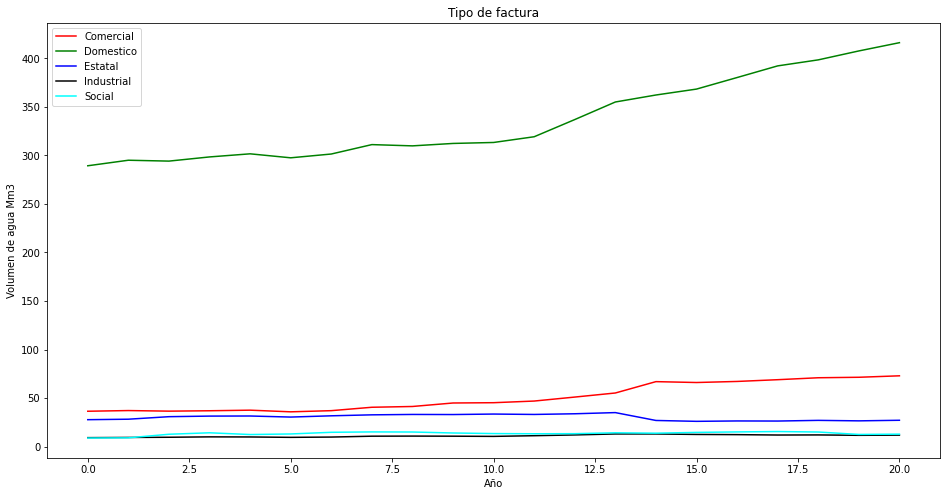

In [ ]:
plt.figure(figsize=(16, 8));
#plt.subplot(1,2,1);
plt.plot(df2.Comercial.values, color='red', label='Comercial')
plt.plot(df2.Doméstico.values, color='green', label='Domestico')
plt.plot(df2.Estatal.values, color='blue', label='Estatal')
plt.plot(df2.Industrial.values, color='black', label='Industrial')
plt.plot(df2.Social.values, color='cyan', label='Social')
plt.title('Tipo de factura')
plt.xlabel('Año')
plt.ylabel('Volumen de agua Mm3')
plt.legend(loc='best')
#plt.show()

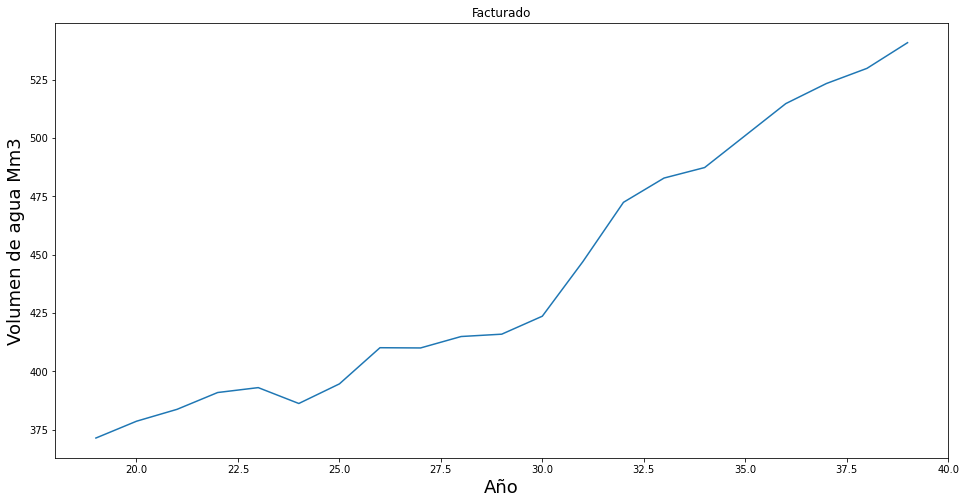

In [ ]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('Facturado')
plt.plot(df2['Facturado Mm3'])
plt.xlabel('Año',fontsize=18)
plt.ylabel('Volumen de agua Mm3',fontsize=18)
plt.show()

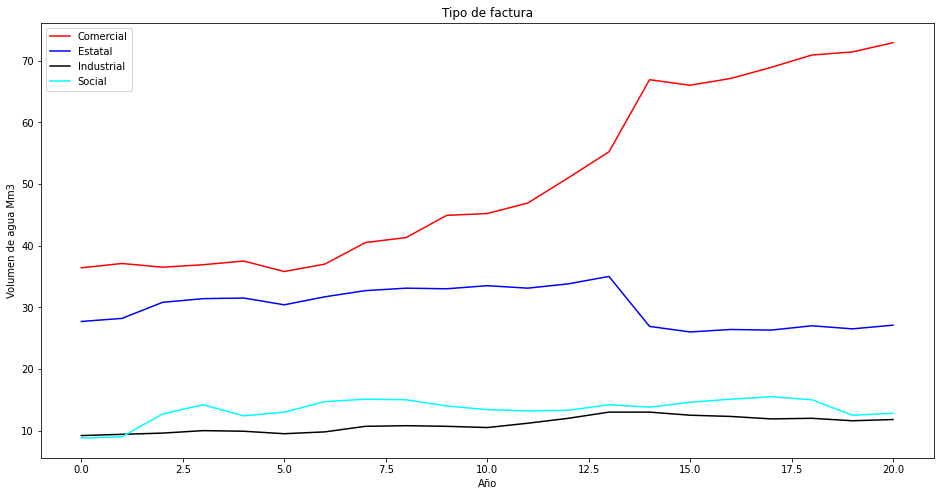

In [ ]:
plt.figure(figsize=(16, 8));
#plt.subplot(1,2,1);
plt.plot(df2.Comercial.values, color='red', label='Comercial')
#plt.plot(df2.Doméstico.values, color='green', label='Domestico')
plt.plot(df2.Estatal.values, color='blue', label='Estatal')
plt.plot(df2.Industrial.values, color='black', label='Industrial')
plt.plot(df2.Social.values, color='cyan', label='Social')
plt.title('Tipo de factura')
plt.xlabel('Año')
plt.ylabel('Volumen de agua Mm3')
plt.legend(loc='best')
#plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 19 to 39
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            21 non-null     int64  
 1   Facturado Mm3  21 non-null     float64
 2   Comercial      21 non-null     float64
 3   Doméstico      21 non-null     float64
 4   Estatal        21 non-null     float64
 5   Industrial     21 non-null     float64
 6   Social         21 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.3 KB


In [ ]:
#Importar las librerías necesarias en Python.
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
# Cargamos la información con los datos
data = pd.read_excel('/content/drive/My Drive/Mis proyectos/sedapal/Vol_facturado.xlsx')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

         Año  Facturado Mm3
0 1980-06-02          257.5
1 1981-06-03          262.5
2 1982-06-04          267.6
3 1983-06-05          272.8
4 1984-06-05          278.1

 Data Types:
Año              datetime64[ns]
Facturado Mm3           float64
dtype: object


In [ ]:
ts

Año
1980-01-01    257.5
1981-01-01    262.5
1982-01-01    267.6
1983-01-01    272.8
1984-01-01    278.1
1985-01-01    283.5
1986-01-01    289.1
1987-01-01    294.7
1988-01-01    300.4
1989-01-01    306.3
1990-01-01    312.2
1991-01-01    318.3
1992-01-01    324.5
1993-01-01    330.8
1994-01-01    337.3
1995-01-01    343.8
1996-01-01    350.5
1997-01-01    357.3
1998-01-01    364.3
1999-01-01    371.4
2000-01-01    378.6
2001-01-01    383.7
2002-01-01    390.9
2003-01-01    393.0
2004-01-01    386.2
2005-01-01    394.6
2006-01-01    410.1
2007-01-01    410.0
2008-01-01    414.9
2009-01-01    415.9
2010-01-01    423.6
2011-01-01    447.0
2012-01-01    472.4
2013-01-01    482.8
2014-01-01    487.3
2015-01-01    501.0
2016-01-01    514.7
2017-01-01    523.3
2018-01-01    529.8
2019-01-01    540.8
2020-01-01    448.4
Name: Facturado Mm3, dtype: float64

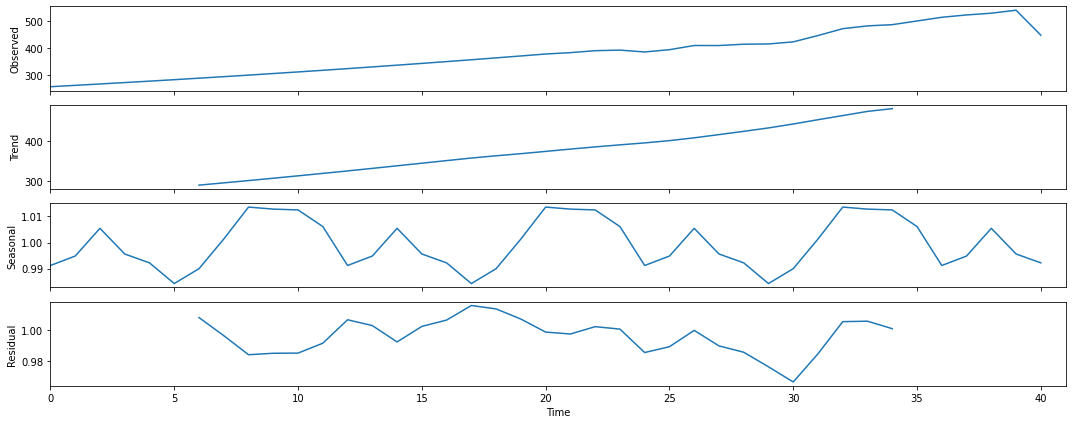

In [ ]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

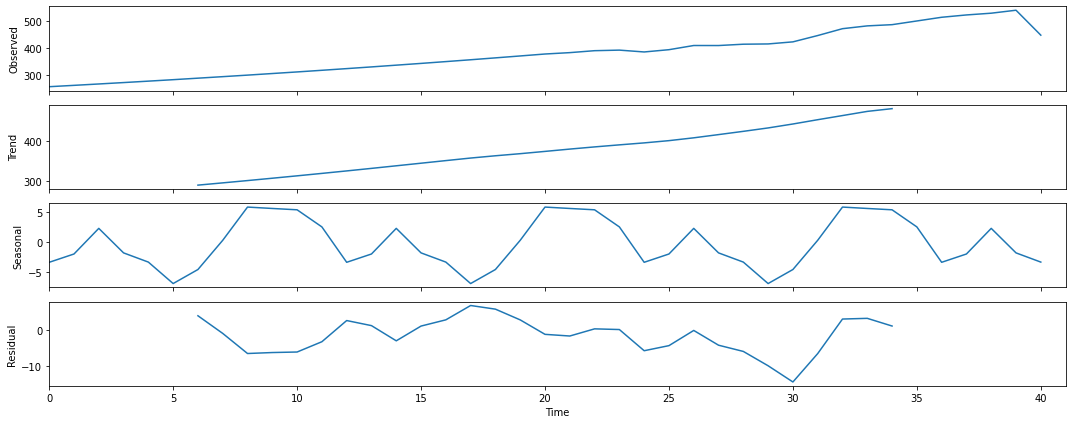

In [ ]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

In [ ]:
# Stationarity tests
def test_stationarity(timeseries):

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  1.037209
p-value                         0.994643
#Lags Used                     10.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [ ]:
# Evaluamos el test con la función creada
test_stationarity(ts)
# Evaluamos las Hipótesis :
# H0: La serie de tiempo no es estacionaria
# H0: La serie de tiempo es estacionaria

Results of Dickey-Fuller Test:
Test Statistic                  1.037209
p-value                         0.994643
#Lags Used                     10.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [ ]:
# to remove trend
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

## 1.Extrayendo los targets

In [ ]:
#1er target
Facturado = df2.filter(['Facturado Mm3'])
#Converting the dataframe to a numpy array
Facturado = Facturado.values

#2do target
Comercial = df2.filter(['Comercial'])
#Converting the dataframe to a numpy array
Comercial = Comercial.values

#3er target
Domestico = df2.filter(['Doméstico'])
#Converting the dataframe to a numpy array
Domestico = Domestico.values

#4to target
Estatal = df2.filter(['Estatal'])
#Converting the dataframe to a numpy array
Estatal = Estatal.values

#5to target
Industrial = df2.filter(['Industrial'])
#Converting the dataframe to a numpy array
Industrial = Industrial.values

#6to target
Social = df2.filter(['Social'])
#Converting the dataframe to a numpy array
Social = Social.values

In [ ]:
Facturado.shape

(21, 1)

In [ ]:
Comercial.shape

(21, 1)

In [ ]:
Domestico.shape

(21, 1)

In [ ]:
Social.shape

(21, 1)

## 2.Numero de filas a entrenar el modelo

In [ ]:
#calcular the number of rows to train the model on
training_data_len = math.ceil( len(Social) *.8)
training_data_len

17

## 3.Escalando

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
#Escalado 1er target
scaled_data = scaler.fit_transform(Facturado)

In [ ]:
#Escalado 2do target
scaled_data_2 = scaler.fit_transform(Comercial)

In [ ]:
#Escalado 3er target
scaled_data_3 = scaler.fit_transform(Domestico)

In [ ]:
#Escalado 4to target
scaled_data_4 = scaler.fit_transform(Estatal)

In [ ]:
#Escalado 5to target
scaled_data_5 = scaler.fit_transform(Industrial)

In [ ]:
#Escalado 6to target
scaled_data_6 = scaler.fit_transform(Social)

## 4.Preparando los pasos de tiempo para el train

In [ ]:
#Data Training 1er target
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
# Crear una estructura de datos con 10 timesteps (Columnas) y 1 salida
x_train=[]
y_train=[]
for i in range(10,len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Data Training 2do target
train_data_2 = scaled_data_2[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
# Crear una estructura de datos con 10 timesteps (Columnas) y 1 salida
x_train_2=[]
y_train_2=[]
for i in range(10,len(train_data_2)):
    x_train_2.append(train_data_2[i-10:i,0])
    y_train_2.append(train_data_2[i,0])
#Convert x_train and y_train to numpy arrays
x_train_2, y_train_2 = np.array(x_train_2), np.array(y_train_2)
#Reshape the data into the shape accepted by the LSTM
x_train_2 = np.reshape(x_train_2, (x_train_2.shape[0],x_train_2.shape[1],1))

In [ ]:
#Data Training 3er target
train_data_3 = scaled_data_3[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
# Crear una estructura de datos con 10 timesteps (Columnas) y 1 salida
x_train_3=[]
y_train_3=[]
for i in range(10,len(train_data_3)):
    x_train_3.append(train_data_3[i-10:i,0])
    y_train_3.append(train_data_3[i,0])
#Convert x_train and y_train to numpy arrays
x_train_3, y_train_3 = np.array(x_train_3), np.array(y_train_3)
#Reshape the data into the shape accepted by the LSTM
x_train_3 = np.reshape(x_train_3, (x_train_3.shape[0],x_train_3.shape[1],1))

In [ ]:
#Data Training 4to target
train_data_4 = scaled_data_4[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
# Crear una estructura de datos con 10 timesteps (Columnas) y 1 salida
x_train_4=[]
y_train_4=[]
for i in range(10,len(train_data_4)):
    x_train_4.append(train_data_4[i-10:i,0])
    y_train_4.append(train_data_4[i,0])
#Convert x_train and y_train to numpy arrays
x_train_4, y_train_4 = np.array(x_train_4), np.array(y_train_4)
#Reshape the data into the shape accepted by the LSTM
x_train_4 = np.reshape(x_train_4, (x_train_4.shape[0],x_train_4.shape[1],1))

In [ ]:
#Data Training 5to target
train_data_5 = scaled_data_5[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
# Crear una estructura de datos con 10 timesteps (Columnas) y 1 salida
x_train_5=[]
y_train_5=[]
for i in range(10,len(train_data_5)):
    x_train_5.append(train_data_5[i-10:i,0])
    y_train_5.append(train_data_5[i,0])
#Convert x_train and y_train to numpy arrays
x_train_5, y_train_5 = np.array(x_train_5), np.array(y_train_5)
#Reshape the data into the shape accepted by the LSTM
x_train_5 = np.reshape(x_train_5, (x_train_5.shape[0],x_train_5.shape[1],1))

In [ ]:
#Data Training 5to target
train_data_6 = scaled_data_6[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
# Crear una estructura de datos con 10 timesteps (Columnas) y 1 salida
x_train_6=[]
y_train_6=[]
for i in range(10,len(train_data_6)):
    x_train_6.append(train_data_6[i-10:i,0])
    y_train_6.append(train_data_6[i,0])
#Convert x_train and y_train to numpy arrays
x_train_6, y_train_6 = np.array(x_train_6), np.array(y_train_6)
#Reshape the data into the shape accepted by the LSTM
x_train_6 = np.reshape(x_train_6, (x_train_6.shape[0],x_train_6.shape[1],1))

## 5.Construyendo el modelo de red neuronal LSTM

In [ ]:
#1er target
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
#model.add(Dropout(0.2))

In [ ]:
# Añadir la segunda capa de LSTM y la regulariación por Dropout
model.add(LSTM(units = 50, return_sequences = True ))
model.add(Dropout(0.2))

In [ ]:
# Añadir la tercera capa de LSTM y la regulariación por Dropout
model.add(LSTM(units = 50, return_sequences = True ))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50, return_sequences=False))


In [ ]:
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#2do target
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#3er target
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_3.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#4to target
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_4.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#5to target
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_5.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#6to target
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_6.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#otra forma de compilar
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Train the model
#model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

NameError: ignored

In [ ]:
#model.predict(x_test)

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 10: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])

NameError: ignored

In [ ]:
len(test_data)

14

In [ ]:
#Convert x_test to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

456.36243997652883

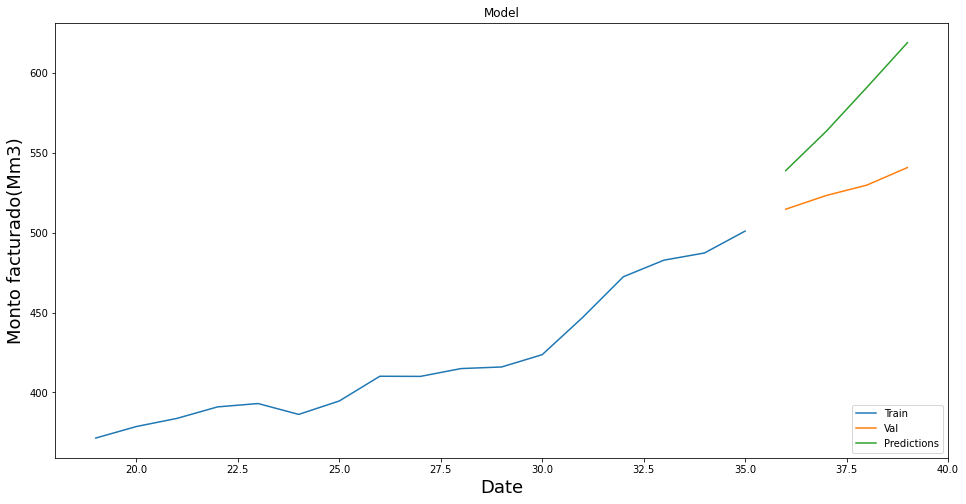

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Monto facturado(Mm3)', fontsize=18)
plt.plot(train['Facturado Mm3'])
plt.plot(valid[['Facturado Mm3', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

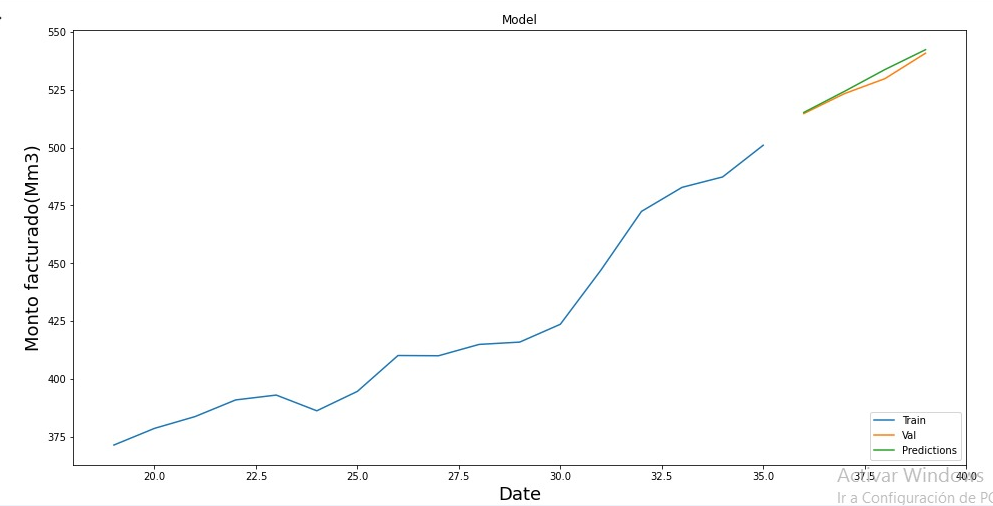

In [ ]:
#Show the valid
valid

,Facturado Mm3,Predictions
36,514.7,507.509216
37,523.3,510.903809
38,529.8,514.705139
39,540.8,517.868042


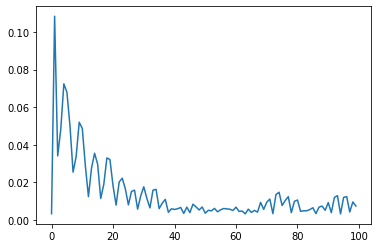

In [ ]:
plt.plot(history.history['loss'])
plt.show()

## Train y test final Mm3

,Año,Facturado Mm3,Comercial,Doméstico,Estatal,Industrial,Social
19,1999,371.4,36.4,289.3,27.7,9.2,8.8
20,2000,378.6,37.1,295.0,28.2,9.4,9.0
21,2001,383.7,36.5,294.1,30.8,9.6,12.7
22,2002,390.9,36.9,298.4,31.4,10.0,14.2
23,2003,393.0,37.5,301.6,31.5,9.9,12.4
24,2004,386.2,35.8,297.5,30.4,9.5,13.0
25,2005,394.6,37.0,301.4,31.7,9.8,14.7
26,2006,410.1,40.5,311.1,32.7,10.7,15.1
27,2007,410.0,41.3,309.8,33.1,10.8,15.0
28,2008,414.9,44.9,312.3,33.0,10.7,14.0


In [ ]:
train=df1.iloc[19:36,:]
train
test=df1.iloc[36:40,:]
test

In [ ]:
df1.iloc[36:40,:]

,Año,Facturado Mm3,Comercial,Doméstico,Estatal,Industrial,Social
36,2016,514.7,68.9,392.2,26.3,11.9,15.5
37,2017,523.3,70.9,398.4,27.0,12.0,15.0
38,2018,529.8,71.4,407.6,26.5,11.6,12.5
39,2019,540.8,72.9,416.1,27.1,11.8,12.8


In [ ]:
# Podemos realizar el test de Dickey-Fuller para observar la presencia de estacionariedad
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    # Determinando los promedios móviles o medias móviles
    rolmean = pd.rolling_mean(timeseries, window=12)

    # Dibujamos la serie original y la serie suavizada
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Evaluamos el test de Dickey - Fuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
# Evaluamos el test con la función creada
test_stationarity(ts)
# Evaluamos las Hipótesis :
# H0: La serie de tiempo no es estacionaria
# H0: La serie de tiempo es estacionaria

In [ ]:
train_set_m3=train.iloc[:, 1:2].values

In [ ]:
test_set_m3=test.iloc[:, 1:2].values

## Escalando el train_set_m3 a train_set_scaled_m3  y  test_set_m3 a test_set_scaled_m3

In [ ]:
#Escalado de caracteristicas (features) train_set_m3
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled_m3 = sc.fit_transform(train_set_m3)

In [ ]:
#Escalado de caracteristicas (features) test_set_m3
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled_m3 = sc.fit_transform(test_set_m3)

## Convertir a DataFrame df_train_set_scaled y  df_test_set_scaled

In [ ]:
df_train_set_scaled_m3=pd.DataFrame(train_set_scaled_m3)
#dimension
df_train_set_scaled_m3.shape

(17, 1)

In [ ]:
df_test_set_scaled_m3=pd.DataFrame(test_set_scaled_m3)
#dimension
df_test_set_scaled_m3.shape

(4, 1)

## Creando los pasos de tiempo time_step para el train y creando los pasos de tiempo time_step para el test

In [ ]:
# Crear una estructura de datos con 10 timesteps (Columnas) y 1 salida
X_train = [] # Creo una lista vacia de covariables
y_train = [] # Creo una lista vacia de target

for i in range(10, 17):
    X_train.append(train_set_scaled_m3[i-10:i, 0])
    y_train.append(train_set_scaled_m3[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) # Reconvertimos las listas a objetos de numpy para poder visualizarlos.

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#10 señales de entrada x
X_train.shape

(7, 10)

In [ ]:
# 1 señal de salida y
y_train.shape

(7,)

## Matrix requerida X_train  Y_train a dataframe

In [ ]:
df_X_train=pd.DataFrame(X_train)
df_X_train

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.055556,0.094907,0.150463,0.166667,0.114198,0.179012,0.298611,0.297840,0.335648
1,0.055556,0.094907,0.150463,0.166667,0.114198,0.179012,0.298611,0.297840,0.335648,0.343364
2,0.094907,0.150463,0.166667,0.114198,0.179012,0.298611,0.297840,0.335648,0.343364,0.402778
3,0.150463,0.166667,0.114198,0.179012,0.298611,0.297840,0.335648,0.343364,0.402778,0.583333
4,0.166667,0.114198,0.179012,0.298611,0.297840,0.335648,0.343364,0.402778,0.583333,0.779321
5,0.114198,0.179012,0.298611,0.297840,0.335648,0.343364,0.402778,0.583333,0.779321,0.859568
6,0.179012,0.298611,0.297840,0.335648,0.343364,0.402778,0.583333,0.779321,0.859568,0.894290


In [ ]:
df_y_train=pd.DataFrame(y_train)
df_y_train

,0
0,0.343364
1,0.402778
2,0.583333
3,0.779321
4,0.859568
5,0.894290
6,1.000000


## Formando el tensor de 3D (batch_size, timesteps, input_dim)

In [ ]:
# Redimensión de los datos
#el primer valor, es la cantidad de datos.
#el segundo, es la cantidad de pasos temporales, en este caso 10, porque a partir de 10 pasos temporales predecimos el siguiente.
#y la cantidad de imput que tenemos en nuestros “timesteps” en este caso 1 porque tomamos una columna.

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(7, 10, 1)

## construccion de la RRN LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
#capa densa
#LSTM = capa de memoria corta

In [ ]:
#Keras prporciona la API de modelo secuencial es una forma de crear modelos de aprendizaje profundo
#donde se crea una instancia de la clase Sequential y se crean y agregan capas de modelo.
#Por ejemplo, las capas se pueden definir y pasar al Sequential como una matriz:
# Añadir la primera capa de LSTM y la regulariación por Dropout
# units : Neuronas LSTM
# return_sequences : Capas de LSTM , mas rubustez, nos devuelve las neuronas con la informacion precedente para seguir apilando LSTM.
# input_shape : Solo la primera capa necesita esta codificacion, las demas no. Necesita solo los timesteps y el numero de variables. ¿Porque no las filas?
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#otra forma de compilar
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [ ]:
#resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Ajustar la RNR al conjunto de entrenamiento
history=model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7156 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 952us/step - loss: 0.4637 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy

In [ ]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(x_test,y_test))

NameError: ignored